In [42]:
#import libraries for task
import numpy as np
import matplotlib.pyplot as plt

import lab_funcs as lf
import lab_funcs_disp as lfd
import lab_funcs_exp as lfe
import my_funcs as mf

# Вычисление рядов

## Khan-sum

### Задания

1. Объясните различие в погрешностях при различных порядках суммирования.
3. Почему алгорит Кэхэна имеет значительно лучшую точность, чем последовательное суммирование?
3. Получим ли мы те же значения погрешностей, если будем суммировать последовательность со слагаемыми разных знаков? Проверьте на следующей последовательности:
$$x_k=\sin k.$$
4. Что произойдет с погрешностью, если элементы выборки с разными знаками упорядочить по возрастанию? По возрастанию абсолютной величины? Проверьте экспериментально.


### Решение

1. Если складывать суммы не учитывая порядок, то мы получим суммы где складываются большие числа с маленькими и погрешность увеличивается за счет отбрасывания нижних порядков.
Если складывать поочередно, то погрешность при каждом суммирование будет меньше, т.к. мы будем складывать относительно равные числа (равного порядка) и погрешность не будет такой большой как в первом случае, т.к. нижние порядки учитваются.
Продемострируем это на практике.

In [43]:
#generate data
K = 7
perm_data = lf.samples(K)
sort_data = lf.sort_samples(K)
sum_perm = lf.direct_sum(perm_data)
sum_sort = lf.direct_sum(sort_data)
cur_sum = lf.exact_sum(K)

print("Relative permut data error: ", lf.relative_error(cur_sum, sum_perm))
print("Relative sort data error: ", lf.relative_error(cur_sum, sum_sort))


Relative permut data error:  4.409195231341988e-11
Relative sort data error:  1.9908519277181958e-11


2. Алгоритм Кэхэна не отбрасывает остаток, он его сохраняет на каждом шаге суммирования. И результат следующего суммирования будет брать во внимание остаток от предыдущего суммирования и создавать остаток для нового суммирования.
При суммирование по возрастанию мы уменьшили погрешность, но не учитывали остаток при суммировании.

Получим сумму для алгоритма Кэхэна

In [44]:
kahan_sum = lf.Kahan_sum(perm_data)
print("Relative Kahan sum error: ", lf.relative_error(cur_sum, kahan_sum))

Relative Kahan sum error:  0.0


3. При суммирование знакочередующегося ряда мы получаем погрешность близкую к машинной. Для алгоритма Кэхэна ничего принципиально не изменится если будем суммировать слагаемые с разными знаками.

In [45]:
N = 1000
correct_sin_sum = mf.get_correct_sin_sum(N)
sin_perm_data = mf.get_sin_perm_samples(N)
sum_sin_perm = mf.Kahan_sum(sin_perm_data)

print("Relative sum error to Kahan permut sin data: ", lf.relative_error(correct_sin_sum, sum_sin_perm))

Relative sum error to Kahan permut sin data:  0.0


4. Если упорядочивать элементы выборки, то относительная погрешность будет уменьшатся. Лучшим вариантом упорядочивания является $\rightarrow$ упорядочивание не по абсолютной величине.

In [46]:

correct_sin_sum = mf.get_correct_sin_sum(N)
sin_sort_data = mf.get_sin_sort_samples(N)
sin_abs_sort_data = mf.get_sin_abs_sort_samples(N)

sum_sin_sort = mf.Kahan_sum(sin_sort_data)
sum_abs_sin_sort = mf.Kahan_sum(sin_abs_sort_data)

print("Relative sum error to Kahan permut sin data: ",
       lf.relative_error(correct_sin_sum, sum_sin_perm))
print("Relative sum error to Kahan sort sin data: ",
       lf.relative_error(correct_sin_sum, sum_sin_sort))
print("Relative sum error to Kahan abs sort sin data: ",
       lf.relative_error(correct_sin_sum, sum_abs_sin_sort))

Relative sum error to Kahan permut sin data:  0.0
Relative sum error to Kahan sort sin data:  4.0918836949832464e-16
Relative sum error to Kahan abs sort sin data:  5.455844926644328e-16


## Вычисление дисперсии

### Задания
1. Обьясните, почему формулы оценки дисперсии имеют разные погрешности, хотя чтобы их применить, нужно выполнить одни и те же действия, но в разном порядке? Оцените погрешности обоих формул.
2. Предложите однопроходную формулу для оценки мат. ожидания и дисперсии, основанную на первой формуле для дисперсии. Воспользуйтесь компенсационным суммированием, чтобы увеличить точность. Попробуйте увеличить точность вычисления по сравнению со второй формулой хотя бы на два порядка.

### Решение
## 1. 
Для объяснения сначала оценим погрешности, после промоделируем это на примере. Из этого сложиться объяснение.



1) $$D[X]\approx\frac1N\sum_{n=1}^N\left(x_n-\frac1N\sum_{n=1}^Nx_n\right)^2.$$

| $f$ | $\delta x$ | $\Delta x$ |
|:-:|:-:|:-:|
| $x_n$ | $\epsilon$ | $\epsilon \cdot x$ |
| $\dfrac{\sum^{N}_{n} x_n}{N}$ | $\dfrac{N}{N} \cdot \epsilon = \epsilon$| $E(x)\cdot \epsilon$|
|$\bigg(x_n - \dfrac{1}{N}\sum_{n=1}^{N}x_n\bigg)^2$|$2\dfrac{2 \cdot E(x)}{D(x)^{0.5} / 2 } \cdot \epsilon$|$8 \epsilon \cdot E(x)\cdot D(x)^{0.5}$|
|$\dfrac{1}{N}\sum_{n=1}^{N}\bigg(x_n - \dfrac{1}{N}\sum_{n=1}^{N}x_n\bigg)^2$|$8\epsilon \dfrac{E(x)}{D(x)^{0.5}}$|$8 \epsilon \cdot E(x)\cdot D(x)^{0.5}$ |



2) $$D[X]\approx \frac1N\sum_{n=1}^N x_n^2-\left(\frac1N\sum_{n=1}^Nx_n\right)^2.$$
| $f$ |$\delta x$ | $\Delta x$ |
|:-:|:-:|:-:|
|$x_n$|$\epsilon$|$E(x)\cdot \epsilon$|
|$\bigg(\dfrac{1}{N}\sum_{n=1}^{N}x_n\bigg)^2$ |$2 \epsilon$ | $2 \epsilon \cdot E(x)^2$ |
|$\dfrac{1}{N}\sum_{n=1}^{N}x_n^2$ |$\dfrac{N}{N}\cdot 2\epsilon$ | $2\epsilon\cdot E(x)^2$ |
|$\dfrac{1}{N}\sum_{n=1}^{N}x_n^2 - \bigg(\dfrac{1}{N}\sum_{n=1}^{N}x_n\bigg)^2$| $2\epsilon + 2\epsilon$|$4 \epsilon \cdot E(x)^2$| 

Как мы видим, погрешность не зависит от N, покажем это на примере. Построим график значения дисперсии от кол-ва элементов $\rightarrow$ N

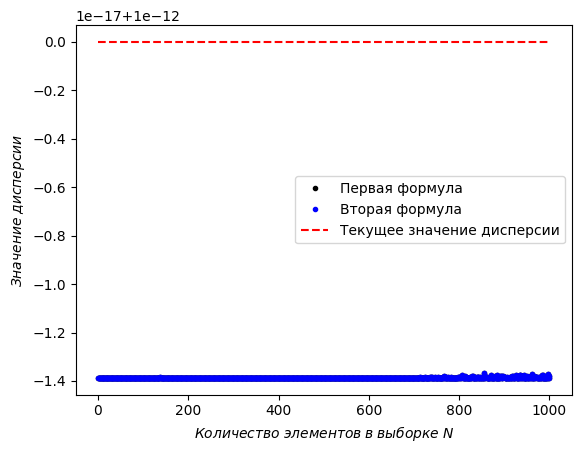

In [47]:
N_max = 1000
N_array = mf.get_N_array(N_max)

x_arrayes = lfd.array_samples(N_max)
cur_disp = lfd.exact_variance()

disp_one_sqrt_f = np.full(N_max, -1.0)
disp_one_sqrt_s = np.full(N_max, -1.0)

for num_of_array in range(0, N_max):
    disp_one_sqrt_f[num_of_array] = lfd.direct_first_var(x_arrayes[num_of_array])
    disp_one_sqrt_s[num_of_array] = lfd.direct_second_var(x_arrayes[num_of_array])

plt.plot(N_array, disp_one_sqrt_f,".k")
plt.plot(N_array, disp_one_sqrt_f, ".b")
plt.plot(N_array, [cur_disp]*len(N_array),"--r") 
plt.xlabel("$Количество\; элементов\; в\; выборке\; N$")
plt.ylabel("$Значение\; дисперсии$")
plt.legend(["Первая формула", "Вторая формула", "Текущее значение дисперсии"])
plt.show() 

## 2. 
Получим однопроходную формулу:

$$N\cdot D_N - (N-1)\cdot D_{N-1} = \sum^N_k(x_k-\frac{1}{N} \sum^N_n x_n)^2 - \sum^{N-1}_k (x_k - \frac{1}{N-1} \sum^{N-1}_n x_n)^2 =$$
$$= (x_N-E_N)^2 + \sum^{N-1}_n ((x_n-E_N)^2 - (x_n-E_{N-1})^2) = (x_N-E_N)^2 + \sum^{N-1}_n (2x_n - E_N - E_{N-1})(E_{N-1} - E_N) $$

Тогда получим:

$$ D_N = \bigg( 1- \frac{1}{N} \bigg) D_{N-1} + \frac{1}{N} (x_N-E_N) (x_N-E_{N-1}) $$

Посчитаем и сравним для каждой формулы по дисперсии

In [48]:

x = lfd.samples(100000)
eps0 = np.finfo(np.double).eps
n = float(len(x))
mean = lfd.get_mean()
delta = lfd.get_delta()
variance = lfd.exact_variance()

theor_1 = 8*eps0*mean*delta**(0.5)
theor_2 = 4*eps0*mean**2

x_oneline_test=[1/2,4/7,3/5,11/19,5/19]
d1=lfd.oneline_first_var(x_oneline_test)
d2=lfd.online_second_var(x_oneline_test)
print('Сравнение однопроходных формул для первой и второй оценки дисперсии: разность получаемых значений',np.abs(d1-d2))

print("Размер выборки:", len(x))
print("Среднее значение:", lfd.exact_mean())
print("Оценка дисперсии:", lfd.exact_variance())
print("Ошибка среднего для встроенной функции:", lfd.relative_error(mean,np.mean(x)))
print("Ошибка дисперсии для встроенной функции:", lfd.relative_error(variance,np.var(x)))


print("Ошибка среднего для последовательного суммирования:", lfd.relative_error(mean,lfd.direct_mean(x)))

print("Ошибка второй оценки дисперсии для последовательного суммирования:",lfd.relative_error(variance,lfd.direct_second_var(x)))
print("Ошибка второй оценки дисперсии для однопроходного суммирования:",lfd.relative_error(variance,lfd.online_second_var(x)))


print("Ошибка первой оценки дисперсии для последовательного суммирования:",lfd.relative_error(variance,lfd.direct_first_var(x)))
print("Ошибка первой оценки дисперсии для однопроходного суммирования:",lfd.relative_error(variance,lfd.oneline_first_var(x)))


print("Теоретическая оценка ошибки дисперсии (по первой формуле):",theor_1)
print("Теоретическая оценка ошибки дисперсии (по второй формуле):",theor_2)
#сравнить ошибки

Сравнение однопроходных формул для первой и второй оценки дисперсии: разность получаемых значений 4.5102810375396984e-17
Размер выборки: 200000
Среднее значение: 100000.0
Оценка дисперсии: 1e-12
Ошибка среднего для встроенной функции: 1.4551915228366853e-16
Ошибка дисперсии для встроенной функции: 1.3874583830542432e-05
Ошибка среднего для последовательного суммирования: 2.1100277081131934e-14
Ошибка второй оценки дисперсии для последовательного суммирования: 375747681.6640625
Ошибка второй оценки дисперсии для однопроходного суммирования: 30517577.125
Ошибка первой оценки дисперсии для последовательного суммирования: 9.422578659773829e-06
Ошибка первой оценки дисперсии для однопроходного суммирования: 2.552985235920161e-06
Теоретическая оценка ошибки дисперсии (по первой формуле): 1.7763568394002505e-13
Теоретическая оценка ошибки дисперсии (по второй формуле): 8.881784197001252e-06


## Вычисление экспоненты

### Задания

1. Относительная ошибка приближения частичной суммой ряда Тейлора показательной функцией много больше для отрицательных аргументов. Объясните причину этого. Воспользуйтесь свойствами показательной функции, чтобы выравнить точность вычислений при положительных и отрицательных аргументах.
2. Почему абсолютная погрешность мала при аргументах близких к нулю? Как именно погрешность зависит от аргумента?
3. Абсолютная погрешность приближения функции частичной суммой ряда равна остатку этого ряда. Оцените остаток ряда Тейлора для экспоненты и найдите число слагаемых, необходимое для вычисления экспоненты с наперед заданной точностью. Проведите эксперимент и убедитесь, что предсказанная вами точность отличается от фактической не более чем на порядок.
4. Ошибка вычисления через частичную сумму складывается из ошибки отбрасывание остатка ряда и ошибки вычисления умножений и сложений. При увеличинии числа слагаемых первая ошибка уменьшается, но вторая растет. Для произвольного x оцените число слагаемых, при которых точность вычисления показательной функции максимальна.
5. Схема Горнера дает несколько меньшую погрешность, чем суммирование одночленов. Почему?
6. Можете предложить лучший способ вычисления показательной функции?

## Решение
## 1.


Ошибку можно объяснить, рассмотрев погрешность для рассматриваемого ряда:

$\bigg|\Delta\dfrac{x_n}{n!}\bigg| = \Delta\dfrac{|x^n|}{n!} = n\cdot\dfrac{|x^n|}{n!}\cdot |\delta x| = |\delta x|\dfrac{|x^n|}{(n-1)!}$


$\Delta S_N \leq \sum_{n=0}^N |\delta x|\dfrac{|x^n|}{(n-1)!} \leq |\delta x\cdot x| \sum_{n=0}^{N-1} \dfrac{|x^n|}{n!}\leq e^{|x|}\cdot |\Delta x|$


$|\delta S_N| = \dfrac{|\Delta x|e^{|x|}}{e^x} = |\Delta x| \cdot \exp[|x|-x]$


Из оценки погрешности видно, что при положительных значениях аргумента - экспонента не вносит вклад в погрешность (т.к. ее агрумент равен нулю), а при отрицательных значениях агрумент экспоненты равен $-2x$, что вносит сильный вклад в эволюцию ошибки - экспоненциально растущая ошибка при больишх значениях аргумента.

## 2.
Рассмотрим при аргументе близком к нулю $Arg\to0\;\;\;\implies\;\;\;\exp(Arg)\to 1\;\;\;\implies\;\;\;\Delta x = \frac{\epsilon}{2}\cdot x \to 0 \implies\;\;\; |\delta S_N| \to 0 $

Абсолютная теоретическая зависимость погрешности от аргумента: $\Delta y = |x| \exp(x) \epsilon$

## 3.
Рассмотрим чему равна погресность конца ряда:

$\bigg|\sum^{+\infty}_{n=N}\dfrac{x^n}{n!}\bigg|\leq \dfrac{|x|^N}{N!}\sum^{+\infty}_{n=0}\dfrac{|x^n|}{N^n} = \dfrac{|x|^{N+1}}{N!(N-|x|)} $

После вычислим погрешность через число обусловленности для встроеннной функции, с данной погрешностью мы будем сравнивать. И вычислим остаток ряда и погрешность, которая накапливается при суммировании N элементов ряда, это будет эксперементальная погрешность.

c:\Users\tor\Desktop\numerecal methods\laboratory_work_2\my_funcs.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  acc[0] = x / (1-np.abs(x))
c:\Users\tor\Desktop\numerecal methods\laboratory_work_2\my_funcs.py:87: RuntimeWarning: divide by zero encountered in scalar divide
  acc[k] = err / np.abs(1 - np.abs(x) / k) / nk


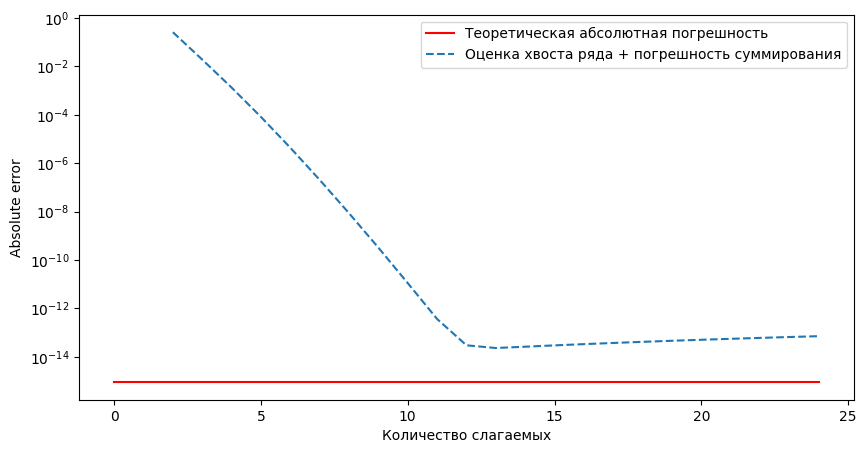

least float =  2.220446049250313e-16
Количтсево слагаемых, которых хватит для подсчета экспоненты с наперед заданной точность: eps =  1e-13 N =  5


In [49]:

eps0=np.finfo(np.double).eps

x = 1
rx = round(x)
standard = np.exp(x)
theoretical_relative_error = (np.abs(x)/2+1)*np.finfo(float).eps
theoretical_absolute_error = theoretical_relative_error * standard
Ns = np.arange(15 + 10*np.abs(rx))

# some error
summ_pogreshnost=Ns*(Ns+3)*x*eps0/2

# sum error for experement
evaluation_absolute_error = mf.exp_evaluation(x, N = Ns[-1])


#ploting
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
#ax2 = plt.twinx(ax1)

ax1.set_xlabel("Количество слагаемых")
ax1.set_ylabel("Absolute error")

line, = ax1.semilogy(Ns, Ns*0+theoretical_absolute_error, '-r')
line.set_label("Теоретическая абсолютная погрешность")

line, = ax1.semilogy(Ns,  evaluation_absolute_error + summ_pogreshnost, '--')
line.set_label("Оценка хвоста ряда + погрешность суммирования")
plt.legend()
plt.show()

# find count of N for current error
current_eps=1e-13
print("least float = ", eps0)
print('Количтсево слагаемых, которых хватит для подсчета экспоненты с наперед заданной точность: eps = ', current_eps, 'N = ' ,mf.how_n_to_complete_exp(current_eps,0.01))


## 4.

Выше уже получили оценку остатка ряда:

$\bigg|\sum^{+\infty}_{n=N}\dfrac{x^n}{n!}\bigg|\leq \dfrac{|x|^N}{N!}\sum^{+\infty}_{n=0}\dfrac{|x^n|}{N^n} = \dfrac{|x|^{N+1}}{N!(N-|x|)} $

Оценим погрешность от суммирования и возведения в степень при вычислении ряда: $$\sum^N_{n=1} \dfrac{x^n}{n!}$$

Погрешность от возведения в степень и сложения: 
$$ \sum^N_{n=1} n\cdot  \delta x = \dfrac{N(N+1) \delta x}{2}$$

Также прибавим погрешность от деления на $n!$: $N \delta x$

Тогда получим полную погрешность:

$$\Delta e^{x} = \dfrac{N(N+3)\cdot x \cdot \delta x }{2} + \dfrac{|x|^{N+1}}{N!(N-|x|)}$$

Чтобы найти оптимальное количество слагаемы, нужно найти минимум этой функции: $\dfrac{\partial \Delta e^{x}}{\partial N} = 0$ и получить N. 
Или перебрать все N и найти про которых обе дроби будут примерно одинаковыми.


In [50]:
x = np.linspace(-10, 10, 1000)
max_N = 100
N = np.zeros(len(x))
for i in range(0, len(x)):
    N[i] = mf.find_N(x[i], max_N)


print("Значение N при котором разница между погрешностью суммирования и остатка минимальна N = ", mf.find_N(x[1], max_N))

plt.plot(x, N,".k")
plt.xlabel("Значения x")
plt.ylabel("Значение N при котором разница между погрешностью суммирования и остатка минимальна")
plt.show() 

AttributeError: module 'my_funcs' has no attribute 'find_N'

## 5.
Аналитическая формула погрешности для схемы Горнера имеет вид $\bigg(1+\dfrac{x}{n}\bigg)$ с единичной погрешностью $\Delta x \dfrac{3}{n}\;\;\;\;\implies\;\;\;\;\sum_{n=1}^{N}\bigg[\Delta x \dfrac{3}{n} \bigg]\leq 3N \Delta x$

Но для обычного суммирования мы уже знаем формулу
$$\delta S_N = \dfrac{N(N+3)\cdot x \cdot \delta x }{2}$$

## 6.
Анализируя погрешности можем сделать вывод, что для оптимального суммирования можно взять алгорим Кэхэна